<a href="https://colab.research.google.com/github/Safri407/CV/blob/main/cvassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment
Subject-22EEC201 Digital image processing and Computer Vision
S1-M. tech RAI


a) Brightness
Brightness is a subjective descriptor that is practically impossible to measure. It embodies the achromatic notion of intensity, and is one of the key factors in describing color sensation. In digital images, brightness refers to the overall lightness or darkness of an image and influences how clearly objects are perceived.

b) Contrast
Contrast refers to the difference in luminance or color that makes an object distinguishable from others within the same field of view. It is a measure of the degree of variation between the brightest and darkest parts of an image. Higher contrast emphasizes edges and details, while lower contrast produces a flatter, less defined appearance.

c) Hue
Hue represents the dominant wavelength of light that is perceived as color. It is the attribute that allows us to classify colors as red, green, blue, yellow, and so on. In digital imaging, hue defines the basic color family without considering brightness or saturation, making it one of the primary descriptors of color.

d) Saturation
Saturation describes the degree of purity or vividness of a color. A highly saturated color appears rich and intense, while a desaturated color appears faded or washed out, moving closer to grayscale. In digital images, saturation determines how much a color deviates from neutral gray at the same brightness level.

e) Sharpness
Sharpness refers to the clarity of detail in a digital image and is closely related to edge definition. It is influenced by both resolution (the number of pixels) and contrast at edges. A sharper image provides distinct boundaries and fine detail, whereas a less sharp image appears blurred or soft.

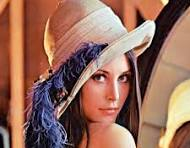

lena_image


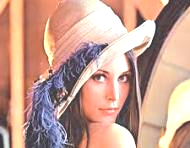

bright_image


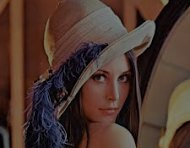

contrasted_image


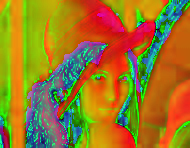

hue


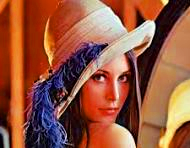

saturation


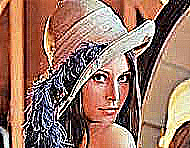

sharpness


In [ ]:
#2
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/lenaimage.jpg')
cv2_imshow(image)
print("lena_image")
#brightness
brightness_adjustment = 55
bright_image = cv2.add(image, brightness_adjustment)
cv2_imshow(bright_image)
print("bright_image")
#contrast
contrasted_image = cv2.convertScaleAbs(image, alpha=0.5, beta=1)
cv2_imshow(contrasted_image)
print("contrasted_image")

#hue
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_image)
'''s = cv2.add(s, 50)
s = np'''
cv2_imshow(hsv_image)
print("hue")

#saturation
s = np.clip(s * 1.5, 0, 255).astype(np.uint8)
hsv_enhanced = cv2.merge([h, s, v])
img_saturated = cv2.cvtColor(hsv_enhanced, cv2.COLOR_HSV2BGR)
cv2_imshow(img_saturated)
print("saturation")

#sharpness
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)
cv2_imshow(sharpened_image)
print("sharpness")
cv2.waitKey(0)
cv2.destroyAllWindows()

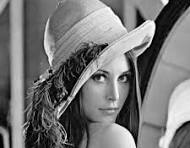

img


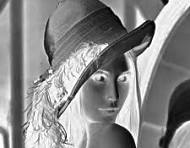

negative


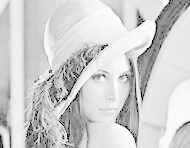

log_transform


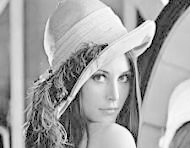

power_law


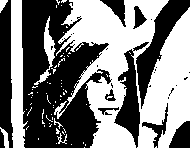

thresholded


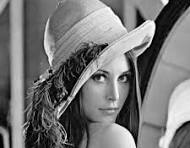

contrast_stretched


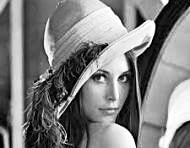

equalized


In [ ]:
#3
imgy = cv2.imread("/content/lenaimage.jpg", 0)   # replace with your grayscale image
cv2_imshow(img)
print("img")
# 1. Negative Transformation
negative = 255 - img
cv2_imshow(negative)
print("negative")
# 2. Logarithmic Transformation
img_float = img.astype(np.float32) + 1  # avoid log(0)
c = 255 / np.log(1 + np.max(img_float))
log_transform = c * np.log(img_float)
log_transform = np.uint8(np.clip(log_transform, 0, 255))
cv2_imshow(log_transform)
print("log_transform")
# 3. Power Law (Gamma) Transformation
gamma = 0.5   # try values <1 (brighter), >1 (darker)
power_law = np.array(255 * (img / 255) ** gamma, dtype=np.uint8)
cv2_imshow(power_law)
print("power_law")
# 4. Thresholding
_, thresholded = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(thresholded)
print("thresholded")
# 5. Contrast Stretching
min_val = np.min(img)
max_val = np.max(img)
contrast_stretched = ((img - min_val) / (max_val - min_val)) * 255
contrast_stretched = np.array(contrast_stretched, dtype=np.uint8)
cv2_imshow(contrast_stretched)
print("contrast_stretched")
# 6. Histogram Equalization
equalized = cv2.equalizeHist(img)
cv2_imshow(equalized)
print("equalized")
cv2.waitKey(0)
cv2.destroyAllWindows()
